In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data = pd.read_csv('./dataset/flipkart_data.csv').head(500)

In [14]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [15]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

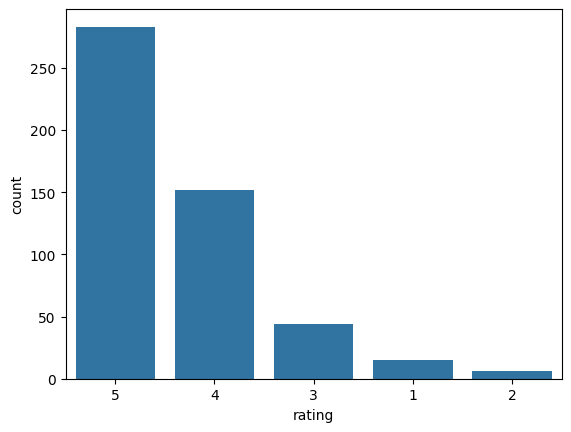

In [16]:
sns.countplot(data=data, x='rating', order=data.rating.value_counts().index)

In [17]:
pos_neg = []

for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg
data

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1
...,...,...,...
495,good product.... you can go for it.initially i...,4,0
496,This is a wonderful companion for both my phon...,4,0
497,The right and left distribution is not okay......,4,0
498,"nice Bluetooth headphone, I am pleased with it...",5,1


In [40]:
from tqdm import tqdm 

def preprocess_text(text_data): 
	preprocessed_text = [] 

	for sentence in tqdm(text_data): 
		# Removing punctuations 
		sentence = re.sub(r'[^\w\s]', '', sentence) 

		# Converting lowercase and removing stopwords 
		preprocessed_text.append(' '.join(token.lower() 
										for token in nltk.word_tokenize(sentence) 
										if token.lower() not in stopwords.words('english'))) 

	return preprocessed_text 


In [42]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review


  0%|          | 0/500 [00:00<?, ?it/s]


TypeError: expected string or bytes-like object

In [ ]:
data.head()

,review,rating,label
0,"[, , , w, , , , n, , c, e, , p, r, , , u, , , ...",5,1
1,"[, w, e, , , , e, , , , u, n, , , , , , v, e, ...",5,1
2,"[, w, e, , , , e, , , , u, n, , , q, u, , l, ,...",4,0
3,"[, , , h, , n, k, , , , , , , , , u, c, h, , ,...",5,1
4,"[, w, e, , , , e, , b, , , , , , , u, n, , , q...",5,1


In [ ]:
data['label'].value_counts()

label
1    283
0    217
Name: count, dtype: int64